# Chapter 7: Statistics - The Normal Distribution

In this chapter, we look at the normal distribution as it is the basis for most of the formulas that we have presented for error analysis. 

The normal distribution is represented by a continuous probability density function, pdf, with two parameters, $\mu$ and $\sigma$, the mean and standard deviation, respectively. 

The pdf is symmetric about $x=\mu$ with a width determined by $\sigma$. Below, we plot the pdf for different values of $\mu$ and $\sigma$ (Figure 7.1 in the text).

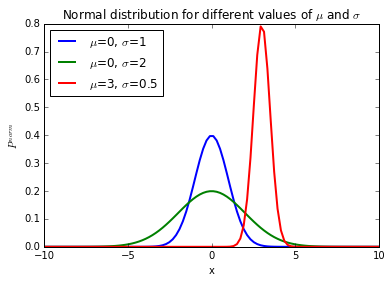

In [18]:
#Figure 7.1
import numpy as np
import pylab as pl
import scipy.stats as stats
%matplotlib inline

xi=np.linspace(-10,10,100)
mu,sigma=0,1
pl.plot(xi,stats.norm.pdf(xi,mu,sigma),label="$\mu$={}, $\sigma$={}".format(mu,sigma),lw=2)
mu,sigma=0,2
pl.plot(xi,stats.norm.pdf(xi,mu,sigma),label="$\mu$={}, $\sigma$={}".format(mu,sigma),lw=2)
mu,sigma=3,0.5
pl.plot(xi,stats.norm.pdf(xi,mu,sigma),label="$\mu$={}, $\sigma$={}".format(mu,sigma),lw=2)
pl.legend(loc='upper left')
pl.xlabel('x')
pl.ylabel('$P^{norm}$')
pl.title('Normal distribution for different values of $\mu$ and $\sigma$')
pl.show()

The binomial and Poisson distributions both approch the normal distribution when their mean is large. Below is a comparison of the binomial and normal distributions:

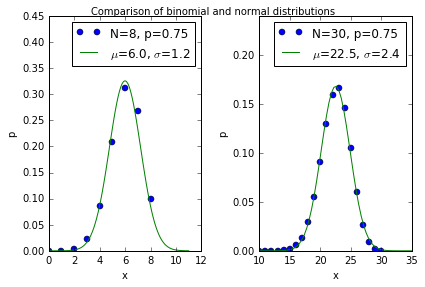

In [6]:
#Figure 7.2
import numpy as np
import pylab as pl
import scipy.stats as stats
from math import *

pl.subplot("121")
N,p=8,0.75
xi=np.linspace(0,N+3,100)
xint=np.arange(0,N+1)
pl.plot(xint,stats.binom.pmf(xint,N,p),'o',label="N={}, p={}".format(N,p))
mu,sigma=N*p,sqrt(N*p*(1-p))
pl.plot(xi,stats.norm.pdf(xi,mu,sigma),label="$\mu$={:.1f}, $\sigma$={:.1f}".format(mu,sigma))
pl.xlabel('x')
pl.ylabel('p')
pl.axis([0,12,0,0.45])
pl.legend()

pl.subplot("122")
N,p=30,0.75
xi=np.linspace(0,N+10,100)
xint=np.arange(0,N+1)
pl.plot(xint,stats.binom.pmf(xint,N,p),'o',label="N={}, p={}".format(N,p))
mu,sigma=N*p,sqrt(N*p*(1-p))
pl.plot(xi,stats.norm.pdf(xi,mu,sigma),label="$\mu$={:.1f}, $\sigma$={:.1f}".format(mu,sigma))
pl.xlabel('x')
pl.ylabel('p')
pl.axis([10,35,0,0.24])
pl.legend()

pl.tight_layout()
pl.suptitle('Comparison of binomial and normal distributions')
pl.show()



Similarly, we can see that the Poisson distribution also approaches the normal distribution:

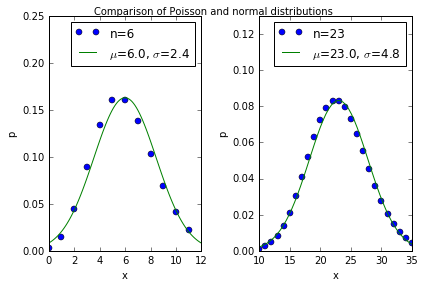

In [8]:
#Figure 7.3
import numpy as np
import pylab as pl
import scipy.stats as stats
from math import *

pl.subplot("121")
n=6
xi=np.linspace(0,2*n,100)
xint=np.arange(0,2*n)
pl.plot(xint,stats.poisson.pmf(xint,n),'o',label="n={}".format(n))
mu,sigma=n,sqrt(n)
pl.plot(xi,stats.norm.pdf(xi,mu,sigma),label="$\mu$={:.1f}, $\sigma$={:.1f}".format(mu,sigma))
pl.xlabel('x')
pl.ylabel('p')
pl.axis([0,12,0,0.25])
pl.legend()

pl.subplot("122")
n=23
xi=np.linspace(0,2*n,100)
xint=np.arange(0,2*n)
pl.plot(xint,stats.poisson.pmf(xint,n),'o',label="n={}".format(n))
mu,sigma=n,sqrt(n)
pl.plot(xi,stats.norm.pdf(xi,mu,sigma),label="$\mu$={:.1f}, $\sigma$={:.1f}".format(mu,sigma))
pl.xlabel('x')
pl.ylabel('p')
pl.axis([10,35,0,0.13])
pl.legend()

pl.tight_layout()
pl.suptitle('Comparison of Poisson and normal distributions')
pl.show()

In example 7-1, we compare the probability of obtaining 140 heads in 300 tosses of a fair coin using the binomial and the normal distrubtions:

In [9]:
#Example 7-1
import scipy.stats as stats
from math import sqrt
#We need the following binomial probability:
N=300
k=140
p=0.5
print("The binomial probability of k=140, N=300, p=0.5 is: {:.5f}".format(stats.binom.pmf(k,N,p)))

#Converting this to the parameters for the normal distribution
mu=N*p
sigma=sqrt(N*p*(1.0-p))
print("The gaussian probability of x=140 for mu={} and sigma={:.2f} is: {:.5f}".format(mu,sigma,stats.norm.pdf(140,mu,sigma)))

The binomial probability of k=140, N=300, p=0.5 is: 0.02367
The gaussian probability of x=140 for mu=150.0 and sigma=8.66 is: 0.02365


In example 7-2, we compare the probabilities of 30 students skipping class when we expect 25, and also compare the probabilities from the normal distribution when doing the proper integral, versus simply evaluating it at x=30

In [14]:
#Example 7-2
import scipy.stats as stats
from math import sqrt
#We need the following Poisson probability:
n=25
k=30
print("Poisson prob of 30 students skipping class: {:.4f}".format(stats.poisson.pmf(k,n)))
#This corresponds to the following gaussian:
mu=n
sigma=sqrt(n)
#Approximating the gaussian probability without taking the actual integral:
print("Gaussian prob of 30 students skipping class evaluated at x=30: {:.4f}".format(stats.norm.pdf(30,mu,sigma)))
#Using the full integral, we need to subtract the cdf for x=30 and the sf for x=31 from 1:
prob=1.0-stats.norm.cdf(30,mu,sigma)-stats.norm.sf(31,mu,sigma)
print("Gaussian prob of 30 students skipping class with integral: {:.4f}".format(prob))

Poisson prob of 30 students skipping class: 0.0454
Gaussian prob of 30 students skipping class evaluated at x=30: 0.0484
Gaussian prob of 30 students skipping class with integral: 0.0436


The cumulative density function (cdf) and the survival fraction (sf), are given by the integral of the normal distritbution between infinity and x. The cdf if the integral from negative infinity to x and thus corresponds to the probability of measuring x or smaller. The sf is the integral from x to positive infinity and corresponds to the probability of measuring x or bigger. Clearly, $cdf(x)+sf(x)=1$. These are plotted in Figure 7.4

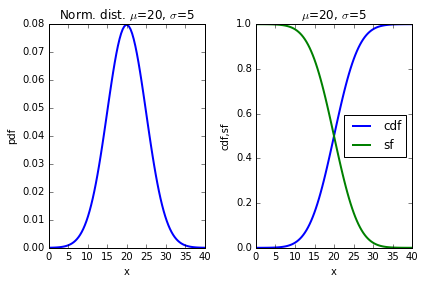

In [17]:
#Figure 7.4
import numpy as np
import scipy.stats as stats
from math import *
import pylab as pl

xi=np.linspace(0,40,100)
pl.subplot(121)
pl.plot(xi,stats.norm.pdf(xi,20,5),lw=2)
pl.xlabel('x')
pl.ylabel('pdf')
pl.title('Norm. dist. $\mu$=20, $\sigma$=5')
pl.subplot(122)
pl.plot(xi,stats.norm.cdf(xi,20,5),label="cdf",lw=2)
pl.plot(xi,stats.norm.sf(xi,20,5),label="sf",lw=2)
pl.xlabel('x')
pl.ylabel('cdf,sf')
pl.title('$\mu$=20, $\sigma$=5')
pl.legend(loc='best')
pl.tight_layout()
pl.show()

In example 7-3, we calculate the probability of scoring between 120 and 130, as well as the probabilty of scoring below 75, for an IQ test with a mean of 100 and a standard deviation of 10:

In [19]:
#Example 7-3
import scipy.stats as stats

#In order to get the probability of being within a certain range,
#it easier to calculate the probability of being outside that range!

pBigger130=stats.norm.sf(130,100,10)
pSmaller120=stats.norm.cdf(120,100,10)
print("Prob of scoring between 120 and 130: {:.2f} %".format(100*(1-pBigger130-pSmaller120)))
print("Prob of scoring 75 or below: {:.2f} %".format(100*(stats.norm.cdf(75,100,10))))

Prob of scoring between 120 and 130: 2.14 %
Prob of scoring 75 or below: 0.62 %


## 7.2 Why most measurement are normally distributed

If we make a measurement that is subject to $N$ random errors with a magnitude of $\epsilon$, the distributions of measurements that we get is given by the normal distribution. Let the true value of the measurement be $X$, then if we have $k$ out of the $N$ errors be positive, we will measure a value of $x$ given by:

$x=X+2k\epsilon-N\epsilon$

Since the errors are random, the number $k$ of positive errors is binomially distributed with a probability of $p=0.5$ (the probability of a given error being positive is 50%).

Below (Figure 7.5), we simulate 100,000 experiments with different values of $N$ (the number of possible random errors), and we see that as $N$ increases and $\epsilon$ decreases, we reach the Normal distribution centered about $\mu=X$ and standard deviation $\sigma_x=\epsilon\sqrt{N}$.

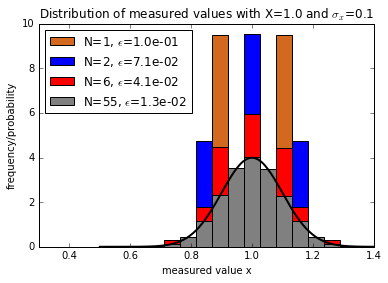

In [20]:
#Figure 7.5
import numpy as np
import scipy.stats as stats
from math import *
import pylab as pl

X=1 #mean value of X
sigma=0.1 #sigma of X
nexp=100000 #number of measurements

#bins for the histograms:
xi=np.linspace(X-5*sigma,X+5*sigma,20)

#Histograms for various values of N
N=1 #number of random errors
eps=sigma/sqrt(N) #random error
k=np.random.binomial(N,0.5,nexp)
x=X+2*k*eps-N*eps
pl.hist(x,bins=xi,label="N={}, $\epsilon$={:.1e}".format(N,eps),normed=True,alpha=1,color='chocolate')

N=2 
eps=sigma/sqrt(N)
k=np.random.binomial(N,0.5,nexp)
x=X+2*k*eps-N*eps
pl.hist(x,bins=xi,label="N={}, $\epsilon$={:.1e}".format(N,eps),normed=True,alpha=1.0,color='blue')

N=6 
eps=sigma/sqrt(N)
k=np.random.binomial(N,0.5,nexp)
x=X+2*k*eps-N*eps
pl.hist(x,bins=xi,label="N={}, $\epsilon$={:.1e}".format(N,eps),normed=True,alpha=1,color='red')

N=55
eps=sigma/sqrt(N)
k=np.random.binomial(N,0.5,nexp)
x=X+2*k*eps-N*eps
pl.hist(x,bins=xi,label="N={}, $\epsilon$={:.1e}".format(N,eps),normed=True,alpha=1.0,color='grey')

#Corresponding normal distribution
xi=np.linspace(X-5*sigma,X+5*sigma,200)
pl.plot(xi,stats.norm.pdf(xi,X,sigma),color='black',linewidth=2)

pl.xlabel('measured value x')
pl.ylabel('frequency/probability')
pl.title('Distribution of measured values with X=1.0 and $\sigma_x$=0.1')
pl.axis([0.3,1.4,0,10])
pl.legend(loc='upper left')
pl.show()

The central limit theorem (CLT) states that the sum of indepedent and identically randomly distributed quantities follows a normal distribution. This is a remarkable result, as it does not require that the random variables themselves be normally distributed. We illustrate this below for an example where we look at the distribution of final marks for class of 100 students that had 20 assigments and where the distribution of marks for each assignment and each student is flat (equal probability of obtaining between 0 and 10 on any given assignment)

Marks for student: 0 : [ 4.07517997  5.96749737  9.5637427   5.15193239  7.4382409   0.79314932
  3.59951474  0.42433217  0.56163549  5.90693879  1.69767106  6.69589056
  1.00652984  7.59864252  0.0255146   5.49295638  9.90349354  8.28181274
  1.60585905  8.45291976]


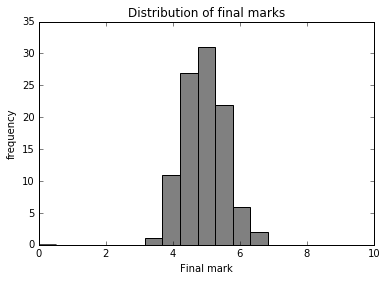

In [26]:
#Figure 7.6
import numpy as np
import pylab as pl

#Example of central limit theorem for 100 students with 20 marks between 0 and 10
#Increase nStudents, and it will approach a gaussian more closely!
nStudents=100
nMarks=20 #marks per student (e.g. 20 assigments)

averages=[]

#Loop over the 100 students
for i in range(nStudents):
    #for each student, generate nMarks random marks between 0 and 10
    #and take the mean of those nMarks to get that student's average
    #for the course.
    #random returns a number between 0 and 1, so we multiply it by 10:
    marks=10*np.random.random(nMarks) 
    average=np.mean(marks)
    #add that student's average to a list of averages for the whole course
    averages.append(average)
    #print out the marks for 1 student, as a check
    if i==0:
        print("Marks for student:",i,":",marks)
    
#histogram all of the averages:
pl.hist(averages, bins=np.linspace(0,10,20), color='grey')

pl.xlabel('Final mark')
pl.ylabel('frequency')
pl.title('Distribution of final marks')
pl.show()

## 7.4 Determining parameters of the normal distributions from data

In Figure 7.7, we show a histogram of 40 measurements that were generated (simulated) from a normal distribution with a "true" mean of 10 and a "true" standard deviation of 0.1 (shown in black). We then use those measurements to estimate, using the principle of maximum likelihood values, the mean and standard deviation of a normal distribution that corresponds to the points (shown in red), which we can compare to the original. As you run this code, you will get variations from the exact result in the text, since it will generate a new set of random data each time.

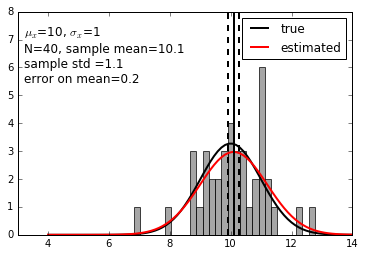

In [29]:
#Figure 7.7
import numpy as np
import scipy.stats as stats
from math import *
import pylab as pl

#Generate 40 data points:
N=40
mu,sigma=10,1
xi=np.random.normal(mu,sigma,N)

#Plot the true distribution and the histogram
xax=np.linspace(4,16,100)
pl.plot(xax,binwidth*N*stats.norm.pdf(xax,mu,sigma),color='black',linewidth=2,label='true')
bins=np.linspace(6,14,40)
binwidth=bins[1]-bins[0]
pl.hist(xi,bins=bins,color='grey',alpha=0.7)
#Estimate the mean, standard deviation, and error on the mean from the data points:
smean=xi.mean()
sstd=xi.std(ddof=1)
stdmean=sstd/sqrt(N)
#Plot a gaussian with the estimated values
pl.plot(xax,binwidth*N*stats.norm.pdf(xax,smean,sstd),color='red',linewidth=2,label='estimated')

#Plot some lines showing the mean and the error on the mean
maxy=8
pl.plot([smean,smean],[0,maxy],color='black',linewidth=2)
pl.plot([smean-stdmean,smean-stdmean],[0,maxy],'--',color='black',linewidth=2)
pl.plot([smean+stdmean,smean+stdmean],[0,maxy],'--',color='black',linewidth=2)
pl.axis([3,14,0,maxy])

#Add a text box with the results
text="$\mu_x$={}, $\sigma_x$={} \nN={}, sample mean={:.1f}\nsample std ={:.1f}\nerror on mean={:.1f}".format(mu,sigma,N,smean,sstd,stdmean)

pl.text(3.2,maxy-2.5,text,fontsize=12)
pl.legend()
pl.show()